**`NGUELONG NAME JEAMS CHANEL`**, `17F2733` et `chanel.nguelong@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - University of Yaoundé I

`PMB`

`10/072023`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [1]:
pip install rdkit


[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2023.03.2
2.3.0


In [3]:
import qiskit.tools.jupyter
%qiskit_version_table

2) Représentations en 2D de cette molecule

In [4]:
from rdkit import Chem

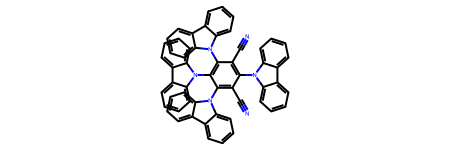

In [5]:
smi='C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N'
mol=Chem.MolFromSmiles(smi)
mol

In [6]:
from rdkit.Chem import AllChem

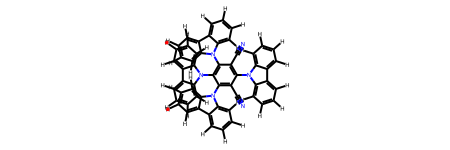

In [7]:
m1=AllChem.AddHs(mol)
m1

3) évaluons les propriétész physico chimiques

In [8]:
from rdkit.Chem import Descriptors

In [9]:
def calculate_descriptors(mol):
    mw1= Descriptors.ExactMolWt(mol)
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    return [mw1, mw, logp, hbd, hba, psa]

In [10]:
mol=Chem.MolFromSmiles(smi)

In [11]:
descriptors = [calculate_descriptors(mol)]

In [12]:
import pandas as pd 

In [13]:
mol1=[mol]
df1=pd.DataFrame(data=mol1, columns=['4CzIPN'])

In [14]:
df = pd.DataFrame(data=descriptors, columns=['Exact MW','MW', 'logp','HBD', 'HBA', 'TPSA'])
data = pd.concat([df1, df], axis=1)
data

4CzIPN    Exact MW       MW  \
0  <rdkit.Chem.rdchem.Mol object at 0x7f518a9d06d0>  788.268845  788.914   

       logp  HBD  HBA  TPSA  
0  13.81836    0    6  67.3

In [15]:
#4)
from rdkit.Chem import MolToXYZFile


In [16]:
rdkit.Chem.AllChem.EmbedMolecule(mol)
rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
rdkit.Chem.MolToXYZFile(mol, 'NGUELONG_NAME_JEAMS_CHANEL_4CzIPN.xyz')

[12:44:18] Molecule does not have explicit Hs. Consider calling AddHs()
[12:44:18] Molecule does not have explicit Hs. Consider calling AddHs()


In [17]:
#6) 

from pyscf import gto

In [20]:
CzIPN_mol = pyscf.gto.M(atom=open('NGUELONG_NAME_JEAMS_CHANEL_4CzIPN.xyz').read(),
 charge=0,
 spin=0,
 basis='631g*',
 unit='Angstrom')

In [21]:
energie_nuc=CzIPN_mol.build().get_enuc()
energie_nuc

7615.519936930917

7) Utilisons le Hamiltonien pour calculer l'état fondamental de la moécule

In [22]:
from qiskit.opflow.operator_globals import I, X, Y, Z

In [23]:
h1 = -0.46959492273396025
h2 = -0.12480163590374627
h3 = -0.026903253444563915
h4 = 0.004924575935052124
h5 = -4.6840929608197336e-06
h6 = -4.683976972721447e-06

In [24]:
H=h1*(I^I) + h2*((Z^I)-(I^Z)) + h3*(Z^Z) + h4*(X^X) + h5*((X^I)+(I^X)) + h6*((X^Z)-(Z^X))

In [25]:
from qiskit.algorithms import NumPyMinimumEigensolver

In [26]:
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'The exact ground state energy is: {exact_result.eigenvalue}')

The exact ground state energy is: -0.6923435163588453


/tmp/ipykernel_549/1463833043.py:1: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)


In [27]:
print(f'The exact ground state vector is: {exact_result.eigenstate}')

The exact ground state vector is: VectorStateFn(Statevector([-4.37289086e-07-1.41634057e-07j,
              9.51297406e-01+3.08116794e-01j,
             -9.38345176e-03-3.03921682e-03j,
             -4.37289086e-07-1.41634057e-07j],
            dims=(2, 2)))
